In [7]:
# import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random
import json
import csv
import requests
import jieba
import re
import io
import matplotlib.pyplot as plt


In [8]:
comments = []
segment = []
boughtTime = []
commentTime = []
lines = []

In [9]:
for i in range(100):
    print("Page: ", i)
    param = {'page': i}
    response = requests.get("https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98&productId=3857685&score=0&sortType=5&pageSize=10&isShadowSku=0&fold=1", params=param)
    content = response.content
    text = response.text[20:-2]
    dicts = json.loads(text)
    commentList = dicts['comments']
    for com in commentList:
        line = []
        # sentence = re.sub(r'[A-Za-z0-9]|/d+', '', com["content"])
        sentence=''.join(re.findall(u'[\u4e00-\u9fff]+', com["content"]))
        uid = com['id']
        btime = com['referenceTime']
        ctime = com['creationTime']
        score = com['score']
        line.append(uid)
        line.append(sentence)
        line.append(btime)
        line.append(score)
        line.append(ctime)
        lines.append(line)

        boughtTime.append(btime)
        commentTime.append(ctime)
        comments.append(sentence)
        seg = jieba.cut(sentence, cut_all=False)
        seg = ' '.join(seg)
        seg = seg.split(" ")
        for word in seg:
            segment.append(word)
        # print(segment)

Page:  0
Page:  1
Page:  2
Page:  3
Page:  4
Page:  5
Page:  6
Page:  7
Page:  8
Page:  9
Page:  10
Page:  11
Page:  12
Page:  13
Page:  14
Page:  15
Page:  16
Page:  17
Page:  18
Page:  19
Page:  20
Page:  21
Page:  22
Page:  23
Page:  24
Page:  25
Page:  26
Page:  27
Page:  28
Page:  29
Page:  30
Page:  31
Page:  32
Page:  33
Page:  34
Page:  35
Page:  36
Page:  37
Page:  38
Page:  39
Page:  40
Page:  41
Page:  42
Page:  43
Page:  44
Page:  45
Page:  46
Page:  47
Page:  48
Page:  49
Page:  50
Page:  51
Page:  52
Page:  53
Page:  54
Page:  55
Page:  56
Page:  57
Page:  58
Page:  59
Page:  60
Page:  61
Page:  62
Page:  63
Page:  64
Page:  65
Page:  66
Page:  67
Page:  68
Page:  69
Page:  70
Page:  71
Page:  72
Page:  73
Page:  74
Page:  75
Page:  76
Page:  77
Page:  78
Page:  79
Page:  80
Page:  81
Page:  82
Page:  83
Page:  84
Page:  85
Page:  86
Page:  87
Page:  88
Page:  89
Page:  90
Page:  91
Page:  92
Page:  93
Page:  94
Page:  95
Page:  96
Page:  97
Page:  98
Page:  99


In [10]:
# coding=utf-8
f = io.open('JDComments.csv','w', encoding="utf-8-sig",newline = '')
writer = csv.writer(f)
writer.writerow(['用户id','评论内容','购买时间','得分','评价时间'])
for l in lines:
    writer.writerow(l)
f.close()

In [11]:
import pandas as pd
from pandas import DataFrame as df

In [12]:
Comment_data = pd.read_csv('JDComments.csv') 


In [13]:
Comment_data.isnull().any()#查看哪些列存在空值

用户id    False
评论内容    False
购买时间    False
得分      False
评价时间    False
dtype: bool

In [14]:
for col in Comment_data:
    if col == "评论内容":
        Comment_data[col].fillna('', inplace=True)
    elif col == "用户ID":
        Comment_data[col].fillna('00000000000', inplace=True)
    else:
        Comment_data[col].fillna(0, inplace=True)
Comment_data.isnull().any()

用户id    False
评论内容    False
购买时间    False
得分      False
评价时间    False
dtype: bool

In [15]:
test = Comment_data['购买时间'][0]
test = str(test)
print(test.split(" "))

['2020-04-03', '14:36:52']


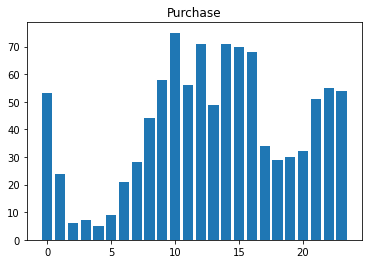

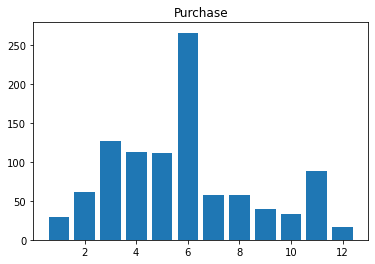

In [16]:
hour_list = []
day_list = []
month_list = []
for t in Comment_data['购买时间']:
    hour = str(t).split(' ')[1].split(':')[0]
    day = str(t).split(' ')[0]
    month = str(t).split(' ')[0].split('-')[1]
    hour_list.append(hour)
    day_list.append(day)
    month_list.append(month)

hour_range = [i for i in range(24)]
hour_cnt = [hour_list.count(str(_).rjust(2,'0')) for _ in range(24)]
plt.bar(hour_range, hour_cnt)
plt.title("Purchase")
plt.show()

month_range = [i for i in range(1, 13)]
month_cnt = [month_list.count(str(_).rjust(2,'0')) for _ in range(1, 13)]
plt.bar(month_range, month_cnt)
plt.title("Purchase")
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
day_encode = LabelEncoder()
day_encoded = day_encode.fit_transform(day_list)

Text(0.5, 1.0, 'Comment')

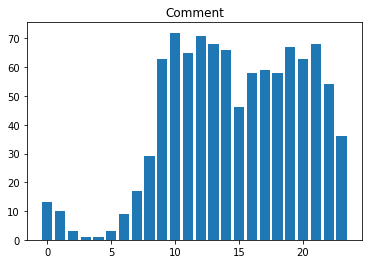

In [18]:
hour_list = []
day_list = []
month_list = []
for t in Comment_data['评价时间']:
    hour = str(t).split(' ')[1].split(':')[0]
    day = str(t).split(' ')[0]
    month = str(t).split(' ')[0].split('-')[1]
    hour_list.append(hour)
    day_list.append(day)
    month_list.append(month)

hour_range = [i for i in range(24)]
hour_cnt = [hour_list.count(str(_).rjust(2,'0')) for _ in range(24)]
plt.bar(hour_range, hour_cnt)
plt.title("Comment")

In [19]:
seg = pd.Series(segment)
seg_cnt = dict(seg.value_counts())

print(seg_cnt)

, '做好': 3, '香气': 3, '过来': 3, '各': 3, '快用': 3, '红血丝': 3, '大瓶': 3, '白色': 3, '发': 3, '那个': 3, '高倍': 3, '并': 3, '光顾': 3, '暂时': 3, '较': 3, '我会': 3, '两天': 3, '大部分': 3, '正常': 3, '强': 3, '皮用': 3, '下去': 3, '揉': 3, '他们': 3, '手臂': 3, '打算': 3, '倒': 3, '价买': 3, '调理': 3, '干燥': 3, '明天': 3, '保护': 3, '方便快捷': 3, '太快': 3, '询问': 3, '一模一样': 3, '注重': 3, '过敏性': 3, '据说': 3, '难受': 3, '试一下': 3, '多久': 3, '忠实': 3, '必备品': 3, '方面': 3, '喷出来': 3, '单品': 3, '超赞': 3, '护理': 3, '透气性': 3, '清新': 3, '特': 3, '礼物': 3, '太小': 3, '就够': 3, '化学': 3, '平常': 3, '降价': 3, '一趟': 3, '状': 3, '小伙伴': 3, '可惜': 3, '商品质量': 3, '全面': 3, '用于': 3, '喜爱': 3, '出差': 3, '背上': 3, '轻松': 3, '人群': 3, '分钟': 3, '明显': 3, '生活': 3, '结果': 3, '表面': 3, '这里': 3, '夏日': 3, '挤': 3, '清淡': 3, '且': 3, '错': 3, '如': 3, '礼品': 3, '不适感': 3, '套装': 3, '懒得': 3, '不算': 3, '一级': 3, '吃': 3, '大大小小': 3, '一口气': 3, '不仅': 3, '上班': 3, '变成': 3, '晒太阳': 3, '买个': 3, '实在': 3, '洗': 3, '妹子': 3, '起泥': 3, '大促': 3, '天天': 3, '当时': 3, '基础': 3, '喷到': 3, '粘': 3, '产品包装': 3, '才能': 3, '在手': 3, '精典': 3, '第二

(-0.5, 599.5, 299.5, -0.5)

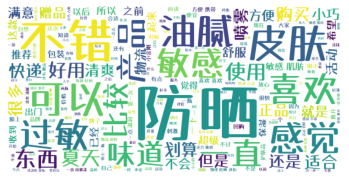

In [20]:
# -*- coding: utf-8 -*-
from wordcloud import WordCloud, STOPWORDS
words = " ".join(segment)
sw = set(STOPWORDS)
sw.add("真的")
sw.add("防晒霜")
sw.add("非常")
sw.add("特别")
sw.add("这个")
sw.add("效果")
sw.add("京东")
sw.add("雅漾")
sw.add("没有")
sw.add("而且")
wc = WordCloud(font_path="Chinese.ttf", background_color='white', stopwords=sw, scale=1.5).generate(words)
plt.imshow(wc)
plt.axis('off')